In [102]:
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LogiR
from sklearn.metrics import confusion_matrix as CM,  precision_score as P,recall_score as R
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd

In [20]:
# use classweight deal with imbalanced data
class_1 = 500
class_2 = 50

In [21]:
centers = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5,0.5]
x,y = make_blobs(n_samples = [class_1,class_2],centers = centers,cluster_std = clusters_std,random_state = 0, shuffle = False )

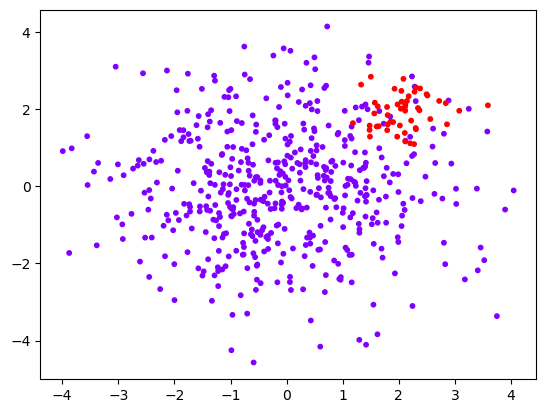

In [22]:
plt.scatter(x[:,0],x[:,1],c=y,cmap = 'rainbow',s=10)

In [23]:
clf = SVC(kernel = 'linear', C= 1.0)
clf.fit(x,y)

SVC(kernel='linear')

In [24]:
#with class weight
wclf = SVC(kernel = 'linear', class_weight = {1:10})
wclf.fit(x,y)

SVC(class_weight={1: 10}, kernel='linear')

In [25]:
clf.score(x,y)

0.9418181818181818

In [26]:
wclf.score(x,y)

0.9127272727272727

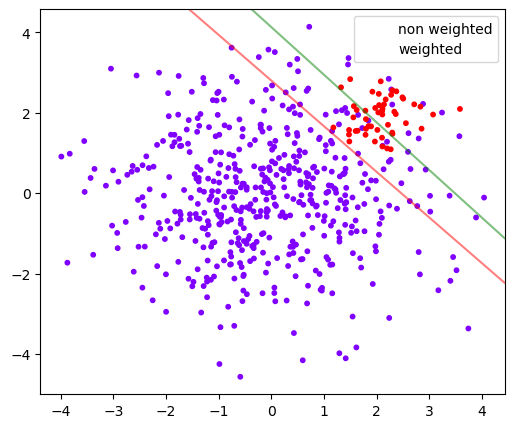

In [43]:
plt.figure(figsize = (6,5))
plt.scatter(x[:,0],x[:,1],c=y,cmap = 'rainbow',s=10)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0],xlim[1],30)
yy = np.linspace(ylim[0],ylim[1],30)
#change to grid
YY,XX = np.meshgrid(yy,xx)
#change to 900 points
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z_clf = clf.decision_function(xy).reshape(XX.shape)
a = ax.contour(XX,YY,Z_clf
            ,colors="green"
            ,levels=[0]
            ,alpha=0.5
            ,linestyles=["-"])

Z_wclf = wclf.decision_function(xy).reshape(XX.shape)
b = ax.contour(XX,YY,Z_wclf
            ,colors="red"
            ,levels=[0]
            ,alpha=0.5
            ,linestyles=["-"])

plt.legend([a.collections[0],b.collections[0]],['non weighted','weighted'],loc = 'upper right')
plt.show()

In [ ]:
# try to catch minority result in lower total accuracy

In [44]:
#calculate precision
(y[y==clf.predict(x)] == 1).sum()/(clf.predict(x) == 1).sum()

0.7142857142857143

In [45]:
(y[y==wclf.predict(x)] == 1).sum()/(wclf.predict(x) == 1).sum()

0.5102040816326531

In [ ]:
# when wrong judge on majority cost high focus on precision

In [46]:
#calculate recall(sensitivity)
(y[y==clf.predict(x)] == 1).sum()/(y == 1).sum()

0.6

In [47]:
(y[y==wclf.predict(x)] == 1).sum()/(y == 1).sum()

1.0

In [48]:
# when can't identify minority cost high focus on precision

In [49]:
#calculate specificity
(y[y==clf.predict(x)] == 0).sum()/(y == 0).sum()

0.976

In [50]:
(y[y==wclf.predict(x)] == 0).sum()/(y == 0).sum()

0.904

In [ ]:
#false positive rate = 1-specificity

In [ ]:
#ROC curve: horizontal axis:false positive rate vertical axis: recall

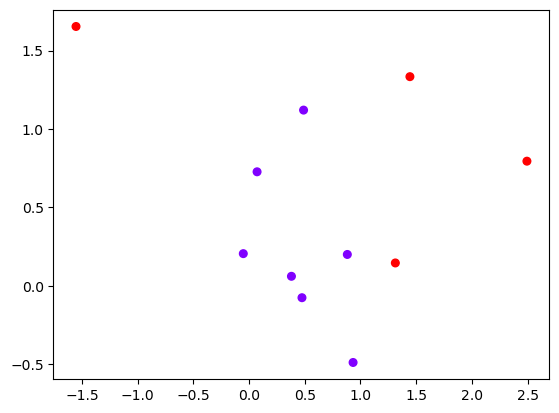

In [66]:
class_1_ = 7
class_2_ = 4

centers = [[0.0,0.0],[1.0,1.0]]
clusters_std = [0.5,1]
x_,y_ = make_blobs(n_samples = [class_1_,class_2_],centers = centers,cluster_std = clusters_std,random_state = 0, shuffle = False )

plt.scatter(x_[:,0],x_[:,1],c=y_,cmap = 'rainbow',s=30)

In [67]:
clf_lo = LogiR().fit(x_,y_)
prob = clf_lo.predict_proba(x_)

In [68]:
prob

array([[0.69461879, 0.30538121],
       [0.5109308 , 0.4890692 ],
       [0.82003826, 0.17996174],
       [0.78564706, 0.21435294],
       [0.77738721, 0.22261279],
       [0.65663421, 0.34336579],
       [0.76858638, 0.23141362],
       [0.34917129, 0.65082871],
       [0.36618382, 0.63381618],
       [0.66327186, 0.33672814],
       [0.6075288 , 0.3924712 ]])

In [57]:
prob = pd.DataFrame(prob)
prob.columns = ['0','1']
prob

,0,1
0,0.694619,0.305381
1,0.510931,0.489069
2,0.820038,0.179962
3,0.785647,0.214353
4,0.777387,0.222613
5,0.656634,0.343366
6,0.768586,0.231414
7,0.349171,0.650829
8,0.366184,0.633816
9,0.663272,0.336728


In [58]:
for i in range(prob.shape[0]):
    if prob.loc[i,'1'] > 0.5:
        prob.loc[i,'pred'] = 1
    else:
        prob.loc[i,'pred'] = 0

In [59]:
prob

,0,1,pred
0,0.694619,0.305381,0.0
1,0.510931,0.489069,0.0
2,0.820038,0.179962,0.0
3,0.785647,0.214353,0.0
4,0.777387,0.222613,0.0
5,0.656634,0.343366,0.0
6,0.768586,0.231414,0.0
7,0.349171,0.650829,1.0
8,0.366184,0.633816,1.0
9,0.663272,0.336728,0.0


In [60]:
prob['y_true'] = y_
prob = prob.sort_values(by = '1', ascending = False)
prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,0.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [62]:
CM(prob.loc[:,'y_true'],prob.loc[:,'pred'],labels = [1,0])

array([[2, 2],
       [0, 7]], dtype=int64)

In [63]:
P(prob.loc[:,'y_true'],prob.loc[:,'pred'],labels = [1,0])

1.0

In [64]:
R(prob.loc[:,'y_true'],prob.loc[:,'pred'],labels = [1,0])

0.5

In [70]:
#use 0.4
prob1 = pd.DataFrame(prob)
prob1.columns = ['0','1']

for i in range(prob.shape[0]):
    if prob1.loc[i,'1'] > 0.4:
        prob1.loc[i,'pred'] = 1
    else:
        prob1.loc[i,'pred'] = 0

In [71]:
prob1['y_true'] = y_
prob1 = prob1.sort_values(by = '1', ascending = False)

In [72]:
CM(prob1.loc[:,'y_true'],prob1.loc[:,'pred'],labels = [1,0])

array([[2, 2],
       [1, 6]], dtype=int64)

In [73]:
P(prob1.loc[:,'y_true'],prob1.loc[:,'pred'],labels = [1,0])

0.6666666666666666

In [74]:
R(prob1.loc[:,'y_true'],prob1.loc[:,'pred'],labels = [1,0])

0.5

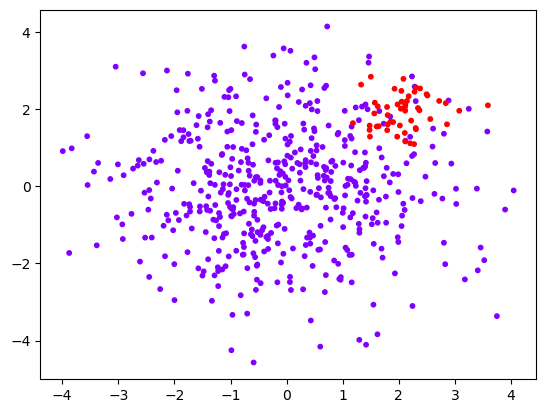

In [75]:
class_1 = 500
class_2 = 50
centers = [[0.0,0.0],[2.0,2.0]]
clusters_std = [1.5,0.5]
x,y = make_blobs(n_samples = [class_1,class_2],centers = centers,cluster_std = clusters_std,random_state = 0, shuffle = False )
plt.scatter(x[:,0],x[:,1],c=y,cmap = 'rainbow',s=10)

In [78]:
clf_prob = SVC(kernel = 'linear', C= 1.0,probability = True).fit(x,y)

In [79]:
clf_prob.predict_proba(x)

array([[0.68457131, 0.31542869],
       [0.27103852, 0.72896148],
       [0.95981364, 0.04018636],
       ...,
       [0.16351296, 0.83648704],
       [0.35987094, 0.64012906],
       [0.32308336, 0.67691664]])

In [80]:
clf_prob.predict_proba(x).shape

(550, 2)

In [81]:
clf_prob.decision_function(x)

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

In [82]:
clf_prob.decision_function(x).shape

(550,)

In [83]:
prob1

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,1.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [84]:
cm = CM(prob1.loc[:,'y_true'],prob1.loc[:,'pred'],labels = [1,0])

In [85]:
cm

array([[2, 2],
       [1, 6]], dtype=int64)

In [86]:
#FPR
cm[1,0]/cm[1,:].sum()

0.14285714285714285

In [87]:
#recall
cm[0,0]/cm[0,:].sum()

0.5

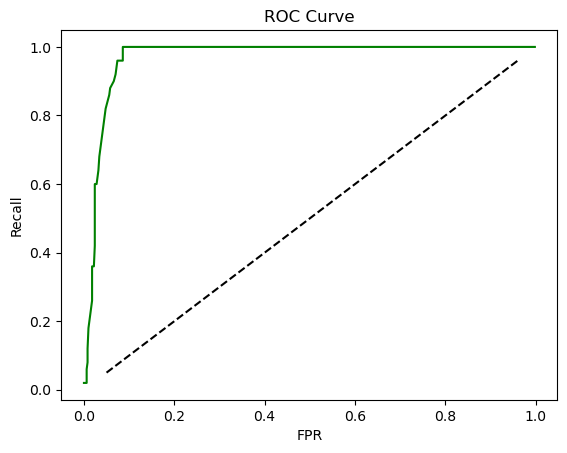

In [96]:
recall = []
FPR = []
probrange = np.linspace(clf_prob.predict_proba(x)[:,1].min(),clf_prob.predict_proba(x)[:,1].max(),num = 50,endpoint = False)

for i in probrange:
    y_predict = []
    for j in range(x.shape[0]):
        if clf_prob.predict_proba(x)[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels = [1,0])
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())
recall.sort()
FPR.sort()

plt.plot(FPR,recall,c='green')
plt.plot(probrange+0.05,probrange+0.05,c='black',linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('Recall')
plt.title('ROC Curve')
plt.show()

In [98]:
#AUC area
FPR,recall,threshold = roc_curve(y,clf_prob.decision_function(x),pos_label = 1)

In [99]:
FPR

array([0.   , 0.   , 0.006, 0.006, 0.008, 0.008, 0.01 , 0.01 , 0.014,
       0.014, 0.018, 0.018, 0.022, 0.022, 0.024, 0.024, 0.028, 0.028,
       0.03 , 0.03 , 0.032, 0.032, 0.036, 0.036, 0.04 , 0.04 , 0.042,
       0.042, 0.044, 0.044, 0.05 , 0.05 , 0.054, 0.054, 0.058, 0.058,
       0.066, 0.066, 0.072, 0.072, 0.074, 0.074, 0.086, 0.086, 1.   ])

In [100]:
recall

array([0.  , 0.02, 0.02, 0.06, 0.06, 0.16, 0.16, 0.2 , 0.2 , 0.22, 0.22,
       0.36, 0.36, 0.42, 0.42, 0.6 , 0.6 , 0.62, 0.62, 0.64, 0.64, 0.68,
       0.68, 0.7 , 0.7 , 0.74, 0.74, 0.76, 0.76, 0.82, 0.82, 0.84, 0.84,
       0.86, 0.86, 0.88, 0.88, 0.92, 0.92, 0.94, 0.94, 0.96, 0.96, 1.  ,
       1.  ])

In [101]:
threshold

array([         inf,   2.18236076,   1.48676267,   1.35964325,
         1.33920817,   1.14038015,   1.13383091,   1.00003406,
         0.85085628,   0.84476439,   0.78571364,   0.60568093,
         0.5389064 ,   0.46718521,   0.44396046,   0.03907036,
        -0.07011269,  -0.10668727,  -0.1258212 ,  -0.13845693,
        -0.14034183,  -0.16790648,  -0.2040958 ,  -0.22137683,
        -0.24381463,  -0.26762451,  -0.34446784,  -0.3467975 ,
        -0.39182241,  -0.40676459,  -0.4589064 ,  -0.46310299,
        -0.49195707,  -0.5088941 ,  -0.53560561,  -0.55152081,
        -0.62628865,  -0.67580418,  -0.78127198,  -0.79874442,
        -0.88438995,  -0.91257798,  -1.01417607,  -1.08601917,
       -10.31959605])

In [105]:
area = AUC(y,clf_prob.decision_function(x))

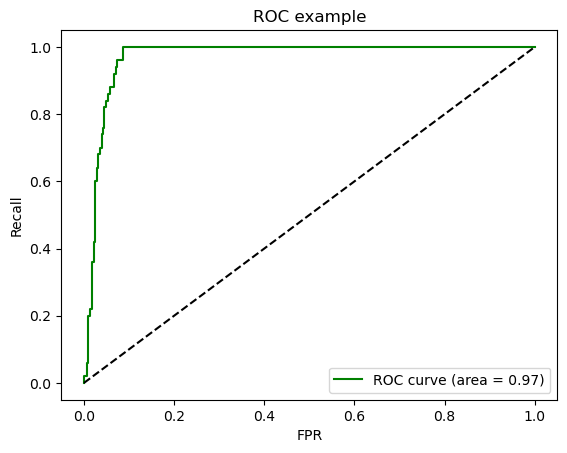

In [109]:
plt.figure()
plt.plot(FPR,recall,color = 'green',label = 'ROC curve (area = %0.2f)' % area)
plt.plot([0,1],[0,1],color = 'black',linestyle = '--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR')
plt.ylabel('Recall')
plt.title('ROC example')
plt.legend(loc = 'lower right')
plt.show()

In [111]:
maxindex = (recall-FPR).tolist().index(max(recall - FPR))
threshold[maxindex]

-1.0860191749391461

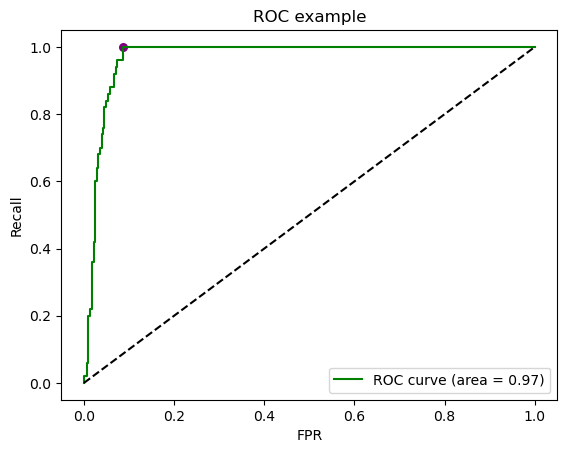

In [114]:
plt.figure()
plt.plot(FPR,recall,color = 'green',label = 'ROC curve (area = %0.2f)' % area)
plt.plot([0,1],[0,1],color = 'black',linestyle = '--')
plt.scatter(FPR[maxindex],recall[maxindex],c='purple',s=30)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR')
plt.ylabel('Recall')
plt.title('ROC example')
plt.legend(loc = 'lower right')
plt.show()